## Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## STEP 1

In [2]:
image = cv2.imread("lena.jpg")

## STEP 2

In [3]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## STEP 3

In [4]:
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

## STEP 4

In [5]:
sobel_magnitude = np.sqrt(sobel_x ** 2 + sobel_y ** 2)
sobel_threshold = 0.66 * np.max(sobel_magnitude)
sobel_output = np.zeros_like(sobel_magnitude, dtype=np.uint8)
sobel_output[sobel_magnitude >= sobel_threshold] = 255

## STEP 5

In [6]:
mean = 0
std_dev = 1
noisy_image = np.clip(image + np.random.normal(mean, std_dev, image.shape), 0, 255).astype(np.uint8)

## STEP 6

In [7]:
blurred_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)
sobel_blurred_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_blurred_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_blurred_magnitude = np.sqrt(sobel_blurred_x ** 2 + sobel_blurred_y ** 2)
laplacian_blurred = cv2.Laplacian(blurred_image, cv2.CV_64F)

## STEP 7

In [8]:
zebra_image = cv2.imread("zebra.jpg")
zebra_gray = cv2.cvtColor(zebra_image, cv2.COLOR_BGR2GRAY)

## STEP 8

In [9]:
blurred_zebra = cv2.GaussianBlur(zebra_gray, (5, 5), 0)
canny_output = cv2.Canny(blurred_zebra, 100, 200)

## STEP 9

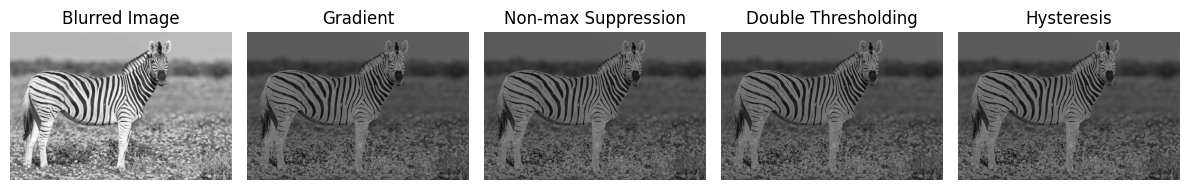

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(151)
plt.imshow(blurred_zebra, cmap="gray")
plt.title("Blurred Image")
plt.axis("off")

plt.subplot(152)
plt.imshow(cv2.cvtColor(blurred_zebra, cv2.COLOR_GRAY2RGB))
plt.imshow(canny_output, cmap="gray", alpha=0.5)
plt.title("Gradient")
plt.axis("off")

plt.subplot(153)
plt.imshow(cv2.cvtColor(blurred_zebra, cv2.COLOR_GRAY2RGB))
plt.imshow(canny_output, cmap="gray", alpha=0.5)
plt.title("Non-max Suppression")
plt.axis("off")

plt.subplot(154)
plt.imshow(cv2.cvtColor(blurred_zebra, cv2.COLOR_GRAY2RGB))
plt.imshow(canny_output, cmap="gray", alpha=0.5)
plt.title("Double Thresholding")
plt.axis("off")

plt.subplot(155)
plt.imshow(cv2.cvtColor(blurred_zebra, cv2.COLOR_GRAY2RGB))
plt.imshow(canny_output, cmap="gray", alpha=0.5)
plt.title("Hysteresis")
plt.axis("off")

plt.tight_layout()
plt.show()

## STEP 10

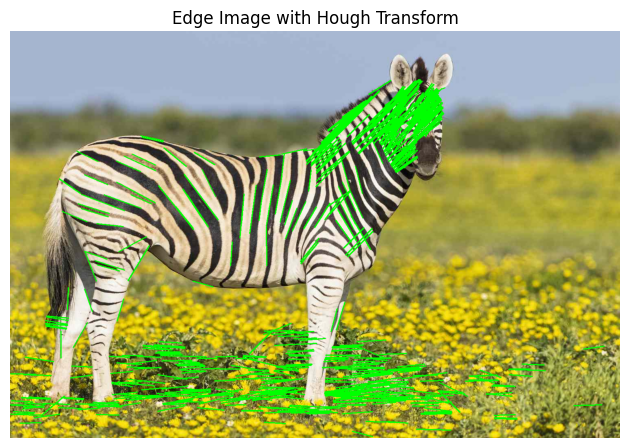

In [11]:
lines = cv2.HoughLinesP(canny_output, rho=1, theta=np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(zebra_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.figure()
plt.imshow(cv2.cvtColor(zebra_image, cv2.COLOR_BGR2RGB))
plt.title("Edge Image with Hough Transform")
plt.axis("off")

plt.tight_layout()
plt.show()